<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Organization" data-toc-modified-id="Organization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Organization</a></span></li></ul></div>

The dataset is called “Twenty Newsgroups”. Here is the official description, quoted from the website:
The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned
(nearly) evenly across 20 different newsgroups. To the best of our knowledge, it was originally collected
by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,” though he does not explicitly mention this collection. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering

## Organization
The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware / comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale / soc.religion.christian). Here is a list of the 20 newsgroups, partitioned (more or less) according to subject matter:

comp.graphics,  comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware
comp.sys.mac.hardware, comp.windows.x, rec.autos
rec.motorcycles, rec.sport.baseball, rec.sport.hockey,	sci.crypt
sci.electronics, sci.med, sci.space, misc.forsale,	talk.politics.misc
, talk.politics.guns, talk.politics.mideast, 	talk.religion.misc
, alt.atheism, soc.religion.christian
</ul>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import metrics 
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

we will work on a partial dataset with only 11 categories out
of the 20 available in the dataset:

In [2]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med','sci.electronics',
              'sci.space','talk.politics.guns','talk.politics.mideast','talk.politics.misc',
              'talk.religion.misc','misc.forsale']

In [3]:
twenty_train=fetch_20newsgroups(subset='train',categories=categories,
                                remove=('footers','headers','quotes'))

# a list of the  categories

In [4]:
print(twenty_train.target_names)

['alt.atheism', 'comp.graphics', 'misc.forsale', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
len(twenty_train.data),len(twenty_train.target),len(twenty_train.filenames)

(5978, 5978, 5978)

In [6]:
print("\n".join(twenty_train.data[0].split('\n')))

I can not believe the way this thread on candida(yeast) has progressed.
Steve Dyer and I have been exchanging words over the same topic in Sci. 
Med. Nutrition when he displayed his typical reserve and attacked a women 
poster for being treated by a liscenced physician for a disease that did 
not exist.  Calling this physician a quack was reprehensible Steve and I 
see that you and some of the others are doing it here as well.  

Let me tell you who the quacks really are, these are the physicans who have 
no idea how the human body interacts with it's environment and how that 
balance can be altered by diet and antibiotics.  These are the physicians 
who dismiss their patients with difficult symptomatology and make them go 
from doctor to doctor to find relief(like Elaine in Sci. Med. Nutrition) and 
then when they find one that solves their problem, the rest start yelling 
quack.  Could it just be professional jealousy?  I couldn't help Elaine or Jon
but somebody else did.  Could they

In [7]:
print("\n".join(twenty_train.data[0].split(',')))

I can not believe the way this thread on candida(yeast) has progressed.
Steve Dyer and I have been exchanging words over the same topic in Sci. 
Med. Nutrition when he displayed his typical reserve and attacked a women 
poster for being treated by a liscenced physician for a disease that did 
not exist.  Calling this physician a quack was reprehensible Steve and I 
see that you and some of the others are doing it here as well.  

Let me tell you who the quacks really are
 these are the physicans who have 
no idea how the human body interacts with it's environment and how that 
balance can be altered by diet and antibiotics.  These are the physicians 
who dismiss their patients with difficult symptomatology and make them go 
from doctor to doctor to find relief(like Elaine in Sci. Med. Nutrition) and 
then when they find one that solves their problem
 the rest start yelling 
quack.  Could it just be professional jealousy?  I couldn't help Elaine or Jon
but somebody else did.  Could they

In [8]:
pd.DataFrame({'Category_Index':twenty_train.target[:10],
              "Category_Names":np.array(twenty_train.target_names)[twenty_train.target[:10]]})

,Category_Index,Category_Names
0,4,sci.med
1,0,alt.atheism
2,7,talk.politics.guns
3,1,comp.graphics
4,3,sci.electronics
5,1,comp.graphics
6,10,talk.religion.misc
7,0,alt.atheism
8,4,sci.med
9,4,sci.med


In [9]:
for i in twenty_train.target[:10]:
    print(twenty_train.target_names[twenty_train.target[i]])

sci.electronics
sci.med
alt.atheism
alt.atheism
comp.graphics
alt.atheism
talk.politics.guns
sci.med
sci.electronics
sci.electronics


#  Extracting features  or feature encoding from text files

In order to perform machine learning on text documents, the raw (text) data cannot be fed directly to the algorithms as these algorithms expect numerical feature vectors so instead we need to turn the text content into numerical feature vectors and the general process of turning text documents into numerical feature vectors is known as ***vectorization***.

# Bag Of Words (BOWs) 
Is a feature extraction technique used for extracting features from textual data for modeling machine learning algorithm and is commonly used in problems such as language modeling and document classification.  A bag-of-words is a representation of textual data, describing the occurrence of words within a sentence or document, disregarding grammar and the order of words.

<p><b>How does Bag of Words Works</b></p>
In order to understand how bag of words works let assume we have two simple text documents:
```md
1. Boys like playing football and Emma is a boy so Emma likes playing football

2  Mary likes watching movies 

```

Based on these two text documents, a list of token (words) for each document is as follows

```javascript
'Boys', 'like', 'playing', 'football', 'and', 'Emma', 'is', 'a', 'boy', 'so', 'Emma', 'likes', 'playing', 'football'


'Mary', 'likes', 'watching', 'movies'
```


denoting document1 by doc1 and 2  by doc2, we will construct a dictionary (key->value pair) of
words for both doc1 and doc2 where each key is the word, and each value is the number of occurrences of that word in the given text document.

```javascript
doc1={ 'a' : 1, 'and' : 1, 'boy' : 1, 'Boys' : 1, 'Emma' : 2, 'football' : 2, 'is' : 1,  'like' : 1,  'likes' : 1, 'playing' : 2,   'so' : 1}

dco2={'likes' : 1, 'Mary' : 1,  'movies' : 1 ,'watching' : 1}
```

<b>NOTE :</b> the order of the words is not important


Putting everything together and considering **a** as a stop word, features extracted using bag of words for these documents will be

In [10]:
doc1='Boys like playing football and Emma is a boy so Emma likes playing football'
doc2="Mary likes watching movies"
corpus=[doc1,doc2]

In [11]:
countV=CountVectorizer()
bg=countV.fit_transform(corpus)

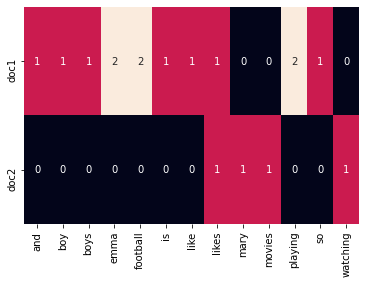

In [12]:
sns.heatmap(bg.toarray(),annot=True,cbar=False
            ,yticklabels=['doc1','doc2'],xticklabels=countV.get_feature_names())
plt.show()

In [13]:
pd.DataFrame(bg.toarray(),columns=[countV.get_feature_names()],index=['doc1','doc2'])

,and,boy,boys,emma,football,is,like,likes,mary,movies,playing,so,watching
doc1,1,1,1,2,2,1,1,1,0,0,2,1,0
doc2,0,0,0,0,0,0,0,1,1,1,0,0,1


In [14]:
countV.vocabulary_.items()

dict_items([('boys', 2), ('like', 6), ('playing', 10), ('football', 4), ('and', 0), ('emma', 3), ('is', 5), ('boy', 1), ('so', 11), ('likes', 7), ('mary', 8), ('watching', 12), ('movies', 9)])

In [15]:
# the index associated with so
countV.vocabulary_.get('so')

11

# BOWS representation Of the news data

In [16]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)# (documents, vocab)

In [17]:
X_train_counts.shape

(5978, 54996)

From <a href='https://scikitlearn.org/stable/tutorial/text_analytics/working_with_text_data.html'>scikitlearn documentation-From occurrences to frequencies</a>

Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [18]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)

In [19]:
X_train_tfidf.shape

(5978, 54996)

# feature extraction pipeline

In [20]:
feature__extraction_pipeline=Pipeline([('count',CountVectorizer()),('tf',TfidfTransformer())])

# adding a classifier to the pipeline

In [21]:
model_pipeline=Pipeline([('extract_feat',feature__extraction_pipeline),
                         ('mult_clf',MultinomialNB())])

In [22]:
model_pipeline.fit(twenty_train.data,twenty_train.target)

Pipeline(steps=[('extract_feat',
                 Pipeline(steps=[('count', CountVectorizer()),
                                 ('tf', TfidfTransformer())])),
                ('mult_clf', MultinomialNB())])

In [23]:
docs_new = ['God is love', 'OpenGL on the GPU is fast','I am selling my car']
predict=model_pipeline.predict(docs_new)
for doc, pred in zip(docs_new,predict):
    print('{}=>{}'.format(doc,twenty_train.target_names[pred]))

God is love=>soc.religion.christian
OpenGL on the GPU is fast=>comp.graphics
I am selling my car=>misc.forsale


# Building a pipeline

In [24]:
news_clf=Pipeline([('count',CountVectorizer()),
                   ('tf',TfidfTransformer()),
                   ('scg_clf',SGDClassifier(max_iter=10,class_weight='balanced'))])

In [25]:
news_clf.fit(twenty_train.data,twenty_train.target)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(steps=[('count', CountVectorizer()), ('tf', TfidfTransformer()),
                ('scg_clf',
                 SGDClassifier(class_weight='balanced', max_iter=10))])

In [26]:
docs_new = ['God is love', 'OpenGL on the GPU is fast','I am selling my car','i will pray tonight']
predict=news_clf.predict(docs_new)
for doc, pred in zip(docs_new,predict):
    print('{}=>{}'.format(doc,twenty_train.target_names[pred]))

God is love=>soc.religion.christian
OpenGL on the GPU is fast=>comp.graphics
I am selling my car=>misc.forsale
i will pray tonight=>soc.religion.christian


# Evaluation of the performance on the test set

In [27]:
twenty_test = fetch_20newsgroups(subset='test',categories=categories, shuffle=True, 
                                 random_state=42)

In [28]:
pred_test=news_clf.predict(twenty_test.data)
np.mean(twenty_test.target==pred_test)

0.8153266331658291

In [29]:
print(metrics.classification_report(twenty_test.target,pred_test,
                                   target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.73      0.63      0.67       319
         comp.graphics       0.87      0.90      0.88       389
          misc.forsale       0.90      0.93      0.91       390
       sci.electronics       0.81      0.87      0.84       393
               sci.med       0.83      0.88      0.85       396
             sci.space       0.89      0.91      0.90       394
soc.religion.christian       0.79      0.85      0.82       398
    talk.politics.guns       0.70      0.87      0.78       364
 talk.politics.mideast       0.94      0.85      0.90       376
    talk.politics.misc       0.77      0.56      0.65       310
    talk.religion.misc       0.65      0.51      0.57       251

              accuracy                           0.82      3980
             macro avg       0.81      0.80      0.80      3980
          weighted avg       0.81      0.82      0.81      3980

